## PYTORCH WORKFLOW

In [3]:
what_were_covering = {
    1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating",
    5: "saving and loading a model",
    6: "putting all together"
}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating',
 5: 'saving and loading a model',
 6: 'putting all together'}

In [4]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks
import matplotlib.pyplot as plt

torch.__version__

'1.12.1'

## 1. Data (preparing and loading)

Data can be almost anything... in machine learning

* Excel spreadsheet
* Images of any king
* Videos
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, create some *known* data using the linear regression formular.
We'll use a linear regression formula to make a straight line with known parameters.

In [5]:
# create *knwon * parameters
weight =.7
bias = .3

#create
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

X.shape,y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

In [9]:
train_split = int(0.8*len(X))

X_train, y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]

len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

In [16]:
def plot_predictions(
        train_data = X_train,
        train_labels = y_train,
        test_data = X_test,
        test_labels = y_test,
        predictions = None):
    plt.figure(figsize = (10,7))

    # plot training data in blue
    plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")

    # plot test data in green
    plt.scatter(test_data,test_labels,c="g",s=4,label="Test data")

    # Are there predictions?
    if predictions is not None:
        plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")

    # show the legend
    plt.legend(prop = {"size":14})

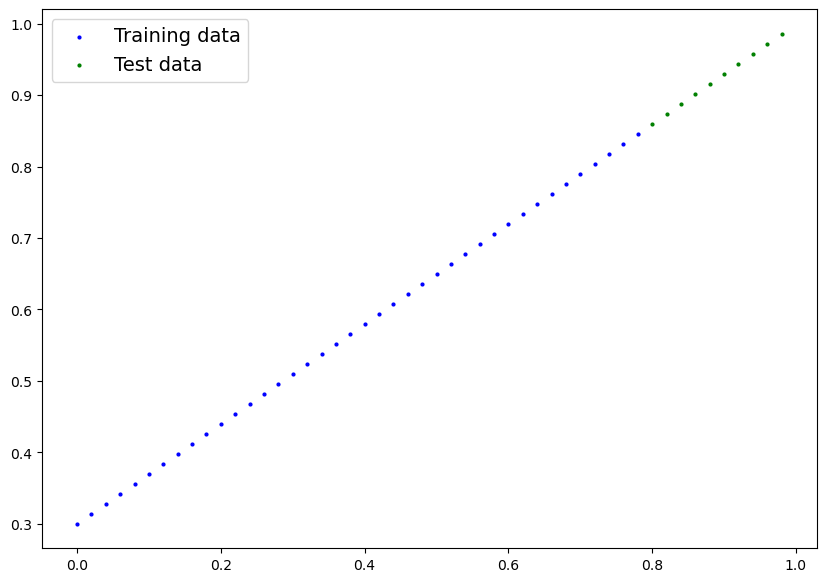

In [19]:
plot_predictions()

## 2. Build model


Because we're going to be building classes throughout the course, recommended to getting familiar
OOP in python, following resource from Real Python: 
https://realpython.com/python3-object-oriented-programming/



In [26]:
# Create linear regression Model class

class LinearRegressionModel(nn.Module): # <- almost everything in pytorch building block
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(
            torch.randn(1,requires_grad=True,dtype=torch.float)
        )
        self.bias = nn.Parameter(
            torch.randn(1,requires_grad=True,dtype = torch.float)
        )



    # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias
    

##### What our model does?
* Start with random values (weights and bias)
* Look at training data and adjust the random values to better represent the ideal values


How does it do so?

Through 2 main algorithm:

1. gradient descent
2. backprogation

### pytorch model building essentials


* torch.nn : Contains all of the buildings for computational graphs( a neural network can be considered as computational graph)

* torch.nn.Parameter - what parameters should our model try and learn,  often a pytorch layer from torch.nn will set these for us

* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()

* torch.optim - this where the optimizers in pytorch live, they will help with gradient descent

* def forward() - All nn.Module subclasses require you to overwrite forward(),